# DevelopmentConstant Callable

In [1]:
import chainladder as cl
import pandas as pd

`DevelopmentConstant` takes a dictionary of development factors and stores them
in a development estimator.  This example demonstrates how a function can be
passed into `DevelopmentConstant` rather than a static dictionary of patterns.
The function should return development patterns for each element of the Triangle's
index. When passing a function to the estimator, it behaves as if calling the
pandas ``apply`` method on the Triangle's index.


In [2]:
# Sample Data
agway = cl.load_sample('clrd').loc['Agway Ins Co', 'CumPaidLoss']

def paid_cdfs(x):
    """ A function that returns different CDFs depending on a specified LOB """
    cdfs = {
    'comauto': [3.832, 1.874, 1.386, 1.181, 1.085, 1.043, 1.022, 1.013, 1.007, 1],
    'medmal': [24.168, 4.127, 2.103, 1.528, 1.275, 1.161, 1.088, 1.047, 1.018, 1],
    'othliab': [10.887, 3.416, 1.957, 1.433, 1.231, 1.119, 1.06, 1.031, 1.011, 1],
    'ppauto': [2.559, 1.417, 1.181, 1.084, 1.04, 1.019, 1.009, 1.004, 1.001, 1],
    'prodliab': [13.703, 5.613, 2.92, 1.765, 1.385, 1.177, 1.072, 1.034, 1.008, 1],
    'wkcomp': [4.106, 1.865, 1.418, 1.234, 1.141, 1.09, 1.056, 1.03, 1.01, 1]}
    patterns = pd.DataFrame(cdfs, index=range(12, 132, 12)).T
    return patterns.loc[x.loc['LOB']].to_dict()

# If it works with pandas apply on the triangle index...
agway.index.apply(paid_cdfs, axis=1)
# ... then it will work in DevelopmentConstant
model = cl.DevelopmentConstant(patterns=paid_cdfs, callable_axis=1, style='cdf')

model.fit(agway)

DevelopmentConstant(callable_axis=1,
                    patterns=<function paid_cdfs at 0x0000017BF1FF7100>,
                    style='cdf')

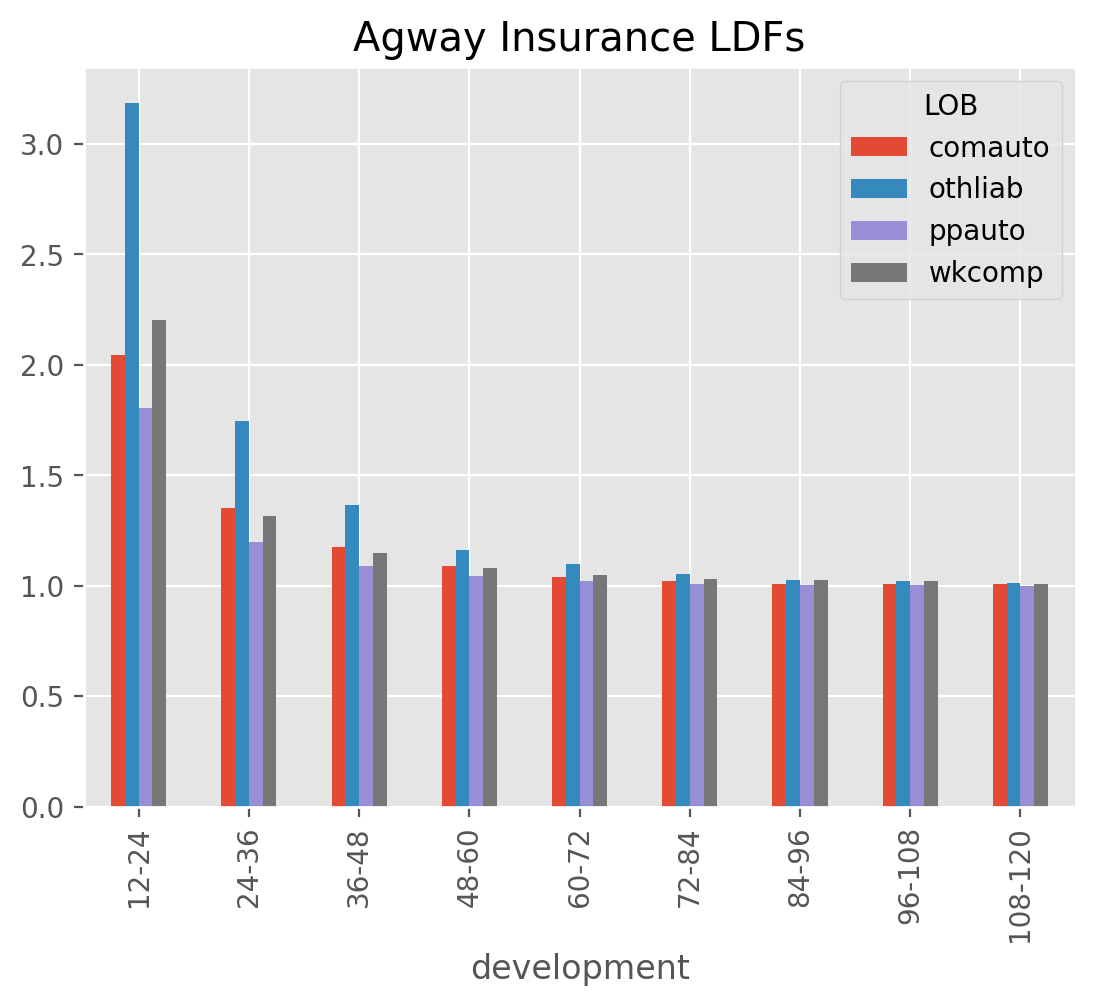

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

ax = model.ldf_.T.plot(kind='bar', title='Agway Insurance LDFs');